<h1>Energy Consumption and Weather patterns in Spain</h1>
<p>The following data analysis and models attempt to find a model that is able to predict particular behaviors of energy usage and weather patterns in Western European regions, notably Spain. The data examines energy prices, energy sources (renewable and non-renewable), aling with weather patterns. We focus on particular cities in Spain, such as Barcelona, Madrid, and others, in an attempt to gain insights into spending patterns in the region.</p>

<h2>Data Examination</h2>
<p>The first portion of this notebook covers data insights by exploring how the data is formatted and the columns that are provided. This allows us to generate a pipeline that can quickly analyze similar datasets in an efficient manner to allow quicker insights</p>

In [434]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


energy_dataset = pd.read_csv('../../data/energy_dataset.csv')
weather_features = pd.read_csv('../../data/weather_features.csv')

In [485]:
energy_dataset.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,Date
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2014-12-31 23:00:00
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,2015-01-01 00:00:00
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,2015-01-01 01:00:00
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,2015-01-01 02:00:00
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,2015-01-01 03:00:00


In [436]:
weather_features.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
178391,2018-12-31 19:00:00+01:00,Seville,287.76,287.15,288.15,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.76,285.15,286.15,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.15,285.15,285.15,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.15,284.15,284.15,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178395,2018-12-31 23:00:00+01:00,Seville,283.97,282.15,285.15,1029,70,3,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [437]:
weather_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [438]:
energy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [439]:
# Handle non-null values by removing them
weather_features.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


In [440]:
energy_dataset.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


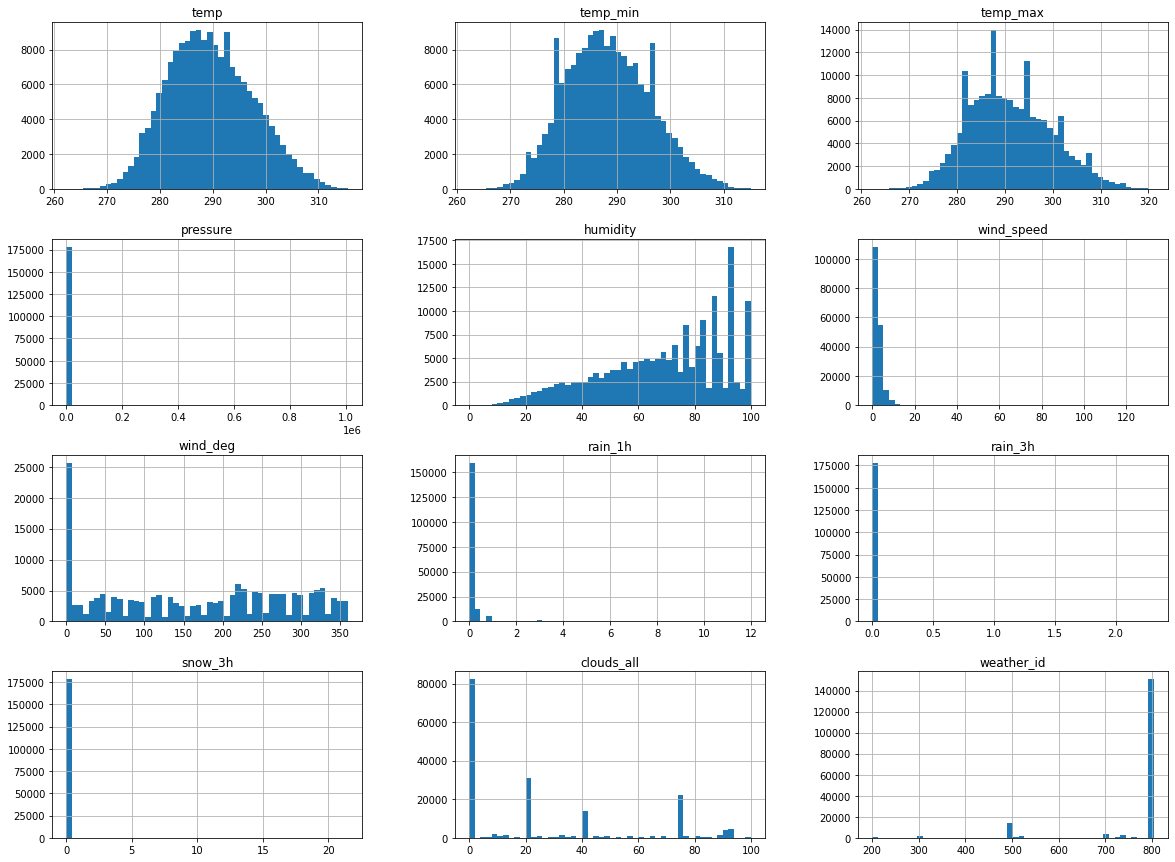

In [441]:
%matplotlib inline
import matplotlib.pyplot as plt
weather_features.hist(bins=50, figsize=(20,15))
plt.show()

In [442]:
# Determine cities in the dataset
weather_features["city_name"].value_counts().index.tolist()

['Madrid', 'Bilbao', 'Seville', ' Barcelona', 'Valencia']

In [454]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create our custom transformer for computing statistics per city
class StatsPeriod(BaseEstimator, TransformerMixin):
    def __init__(self, period="M", drop=False, dates_col="Dates", city_col="city_name", by_city=False):
        self.period = period
        self.drop = drop
        self.dates_col = dates_col
        self.city_col = city_col
        self.by_city=by_city
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        # If we are organizing by city, do so
        if(self.by_city):
            cities = x[self.city_col].value_counts().index.tolist()
            datasets = {} # Dictionary to hold our data

            # Drop any rows that contain any missing data
            x = x.dropna(axis=0)

            # Compute a dataframe for each city
            for city in cities:
                # Get the dataframe only associated with a particular city
                bool_array = x[self.city_col] == city
                df = x[bool_array].copy()   # Ensure to create a copy so that we aren't working with a view

                # Convert dates to datetime objects
                df["Date"] = pd.to_datetime(df[self.dates_col], errors='coerce', utc=True).dt.tz_localize(None)
                if self.drop:
                    df.drop([self.dates_col], axis=1)

                # Drop all categorical variables (type str)
                df_numeric = df.select_dtypes(["number", "datetime"])

                # Convert dataset to specific period and compute mean based on period
                df_numeric["Date"] = df_numeric["Date"].dt.to_period(self.period)
                datasets[city] = df_numeric.groupby("Date").mean() # append the dataframe to the datasets array
            return datasets # Return our datasets
        else:
            # Drop any rows that contain any missing data
            df = x

            # Convert dates to datetime objects
            df["Date"] = pd.to_datetime(df[self.dates_col], errors='coerce', utc=True).dt.tz_localize(None)
            if self.drop:
                df.drop([self.dates_col], axis=0)

            # Drop all categorical variables (type str)
            df_numeric = df.select_dtypes(["number", "datetime"])

            # Convert dataset to specific period and compute mean based on period
            df_numeric["Date"] = df_numeric["Date"].dt.to_period(self.period)
            return df_numeric.groupby("Date").mean() # append the dataframe to the datasets array



In [462]:
# Create our transformation pipeline
from sklearn.pipeline import Pipeline

weather_period_pipeline = Pipeline([
    ("city_stats", StatsPeriod(period="M", drop=True, dates_col="dt_iso", by_city=True))
])

energy_period_pipeline = Pipeline([
    ("daily stats", StatsPeriod(period="D", drop=False, dates_col="time", by_city=False))
])

city_weather_month = weather_period_pipeline.fit_transform(weather_features)

# Use the pipeline on energy as well
energy_dataset.drop(["generation hydro pumped storage aggregated"], axis=1)
energy_daily = energy_period_pipeline.fit_transform(energy_dataset)

<h1>Energy Analysis</h1>
<p>The following analyzes various variables in the energy dataset to find correlations. Note that the data used below makes use of the pipeline process above and only uses data on the test set. Some of the graphs shown here include</p>

<ul>
    <li>Heatmap of all variables</li>
    <li>Graph of prices over various variables, including time</li>
    <li>Pearson's r</li>
    <li>Time Series Analysis</li>
</ul>

Any models from this analysis are explored using the techniques discussed in following subsections

In [464]:
# Split into test and training set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(energy_daily, test_size=0.2, random_state=42)

<AxesSubplot:>

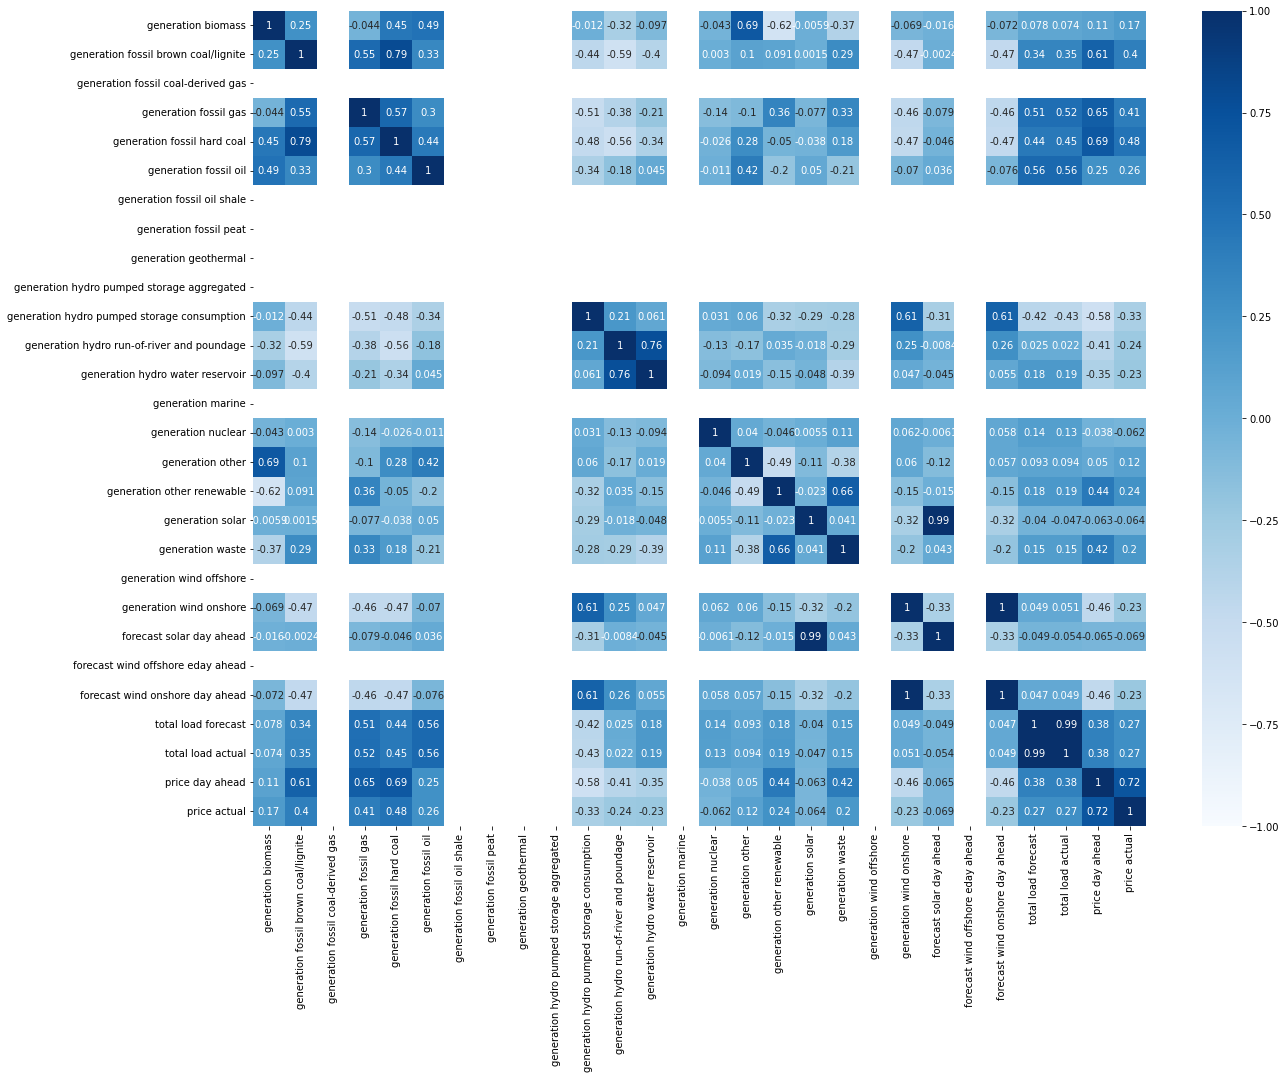

In [465]:
# Generate a heatmap
plt.figure(figsize=(20,15))
sns.heatmap(train_set.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues")

In [483]:
# Compute pearsons r
corr_matrix = train_set.corr()

corr_matrix["price actual"].sort_values(ascending=False)

generation fossil hard coal                    1.000000
generation fossil brown coal/lignite           0.789686
price day ahead                                0.694565
generation fossil gas                          0.572441
price actual                                   0.479885
generation biomass                             0.452102
total load actual                              0.445176
generation fossil oil                          0.443602
total load forecast                            0.443061
generation other                               0.281767
generation waste                               0.175346
generation nuclear                            -0.025940
generation solar                              -0.038219
forecast solar day ahead                      -0.045809
generation other renewable                    -0.050223
generation hydro water reservoir              -0.344977
generation wind onshore                       -0.467600
forecast wind onshore day ahead               -0

In [484]:
corr_matrix["generation fossil hard coal"].sort_values(ascending=False)

generation fossil hard coal                    1.000000
generation fossil brown coal/lignite           0.789686
price day ahead                                0.694565
generation fossil gas                          0.572441
price actual                                   0.479885
generation biomass                             0.452102
total load actual                              0.445176
generation fossil oil                          0.443602
total load forecast                            0.443061
generation other                               0.281767
generation waste                               0.175346
generation nuclear                            -0.025940
generation solar                              -0.038219
forecast solar day ahead                      -0.045809
generation other renewable                    -0.050223
generation hydro water reservoir              -0.344977
generation wind onshore                       -0.467600
forecast wind onshore day ahead               -0

KeyError: 'price forecast'

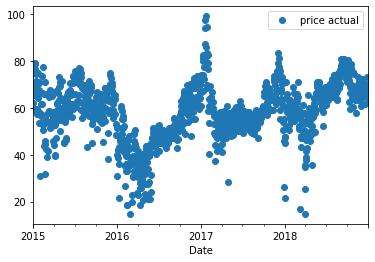

In [478]:
# Graph various variables against time
train_set.plot(y="price actual", marker="o", linestyle="")
train_set.plot(y="price forecast", marker="o", linestyle="")